# **Multiple Linear Regression with Gradient Descent**

This notebook is an implementation from scratch of multiple linear regression model using gradient descent cost function on synthetic data.

## **Step 1: Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Step 2: Generate Synthetic Data**

In [2]:
# Generate some synthetic data for demonstration
np.random.seed(0)

# 1. Generate two features (X1 and X2) with random values
n_samples = 100  # Number of data points
X1 = np.random.rand(n_samples, 1) * 10  # Feature 1, scaled between 0 and 10
X2 = np.random.rand(n_samples, 1) * 20  # Feature 2, scaled between 0 and 20

# 2. Define the true coefficients for the linear model
theta0 = 5  # Intercept
theta1 = 3  # Coefficient for X1
theta2 = 2  # Coefficient for X2

# 3. Create the target variable 'y' using the linear equation: y = theta0 + theta1 * X1 + theta2 * X2
# Adding some noise to make it more realistic
noise = np.random.randn(n_samples, 1)  # Random noise
y = theta0 + theta1 * X1 + theta2 * X2 + noise


In [6]:
X1.min()

0.046954761925470656

In [7]:
X1.max()

9.883738380592263

In [4]:
X1.shape

(100, 1)

In [8]:
X2.min()

0.23428168370003943

In [9]:
X2.max()

19.97694013135733

In [10]:
X2.shape

(100, 1)

In [11]:
y

array([[49.70370251],
       [36.17606841],
       [51.34319351],
       [59.39621725],
       [27.16173727],
       [49.35264882],
       [42.7587144 ],
       [54.7308175 ],
       [41.6077126 ],
       [55.457569  ],
       [45.63655094],
       [53.17842339],
       [51.20853764],
       [44.98231979],
       [40.60385336],
       [23.79283628],
       [41.70751042],
       [52.57848468],
       [62.57987416],
       [59.48322257],
       [62.5653118 ],
       [48.33818243],
       [56.63219375],
       [54.19296242],
       [25.14844081],
       [47.07840791],
       [ 9.42470815],
       [43.17965703],
       [47.6876226 ],
       [27.44090483],
       [36.55290218],
       [45.4299238 ],
       [23.36390954],
       [35.5273261 ],
       [27.06943353],
       [47.43102623],
       [46.29659882],
       [48.4679592 ],
       [59.91984982],
       [42.53980006],
       [52.4188914 ],
       [33.63693757],
       [45.52676884],
       [43.8202263 ],
       [56.88157919],
       [53

In [12]:
y.shape

(100, 1)

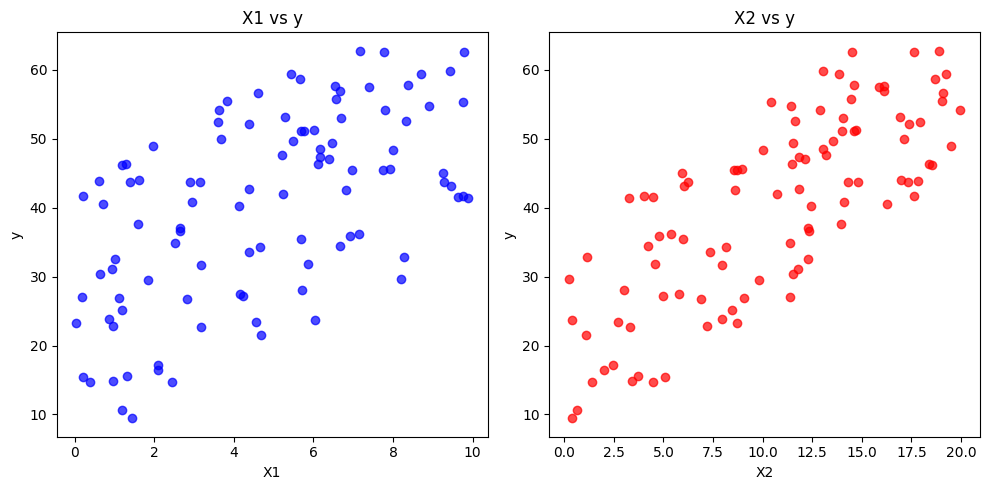

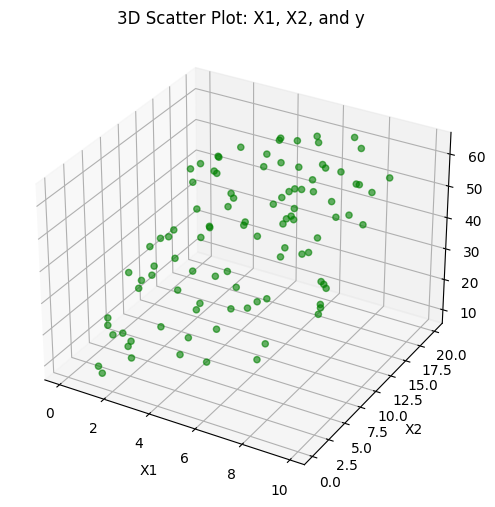

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Scatter Plot: Feature X1 vs Target y
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X1, y, color='b', alpha=0.7)
plt.title('X1 vs y')
plt.xlabel('X1')
plt.ylabel('y')

# Scatter Plot: Feature X2 vs Target y
plt.subplot(1, 2, 2)
plt.scatter(X2, y, color='r', alpha=0.7)
plt.title('X2 vs y')
plt.xlabel('X2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# 3D Scatter Plot: X1, X2, and y
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, c='g', marker='o', alpha=0.6)
ax.set_title('3D Scatter Plot: X1, X2, and y')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

plt.show()


In [15]:
#Scaling the features so that the gradient descent would converge. It was difficult to converge.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)


## **Step 3: Initialize Parameters for Gradient Descent**

We need to initialize the parameters (theta0 for the intercept, theta1 and theta2 for the slope and min_loss for the loss value) and set the hyperparameters (learning_rate and n_iterations)

In [31]:
# Initialize parameters
theta0 = 0  # Intercept
theta1 = 0  # Slope
theta2 = 0  # Slope

# Hyperparameters
learning_rate = 0.0011
n_iterations =110

m = len(X1)  # Number of data points

# Variables to track the minimum loss
min_loss = float('inf')
best_theta0, best_theta1,best_theta2 = theta0, theta1,theta2
loss_history = []  # Store loss values

## **Step 4: Implement the Gradient Descent Algorithm**

In [32]:
# Gradient Descent
for iteration in range(n_iterations):
    print('iteration :',iteration+1)
    # Predicted values
    y_pred = theta0 + (theta1 * X1_scaled)+ (theta2 * X2_scaled)

    # Compute Mean Squared Error (MSE) loss
    loss = (1/m) * np.sum((y_pred - y) ** 2)

    print('loss Value:',loss)

    loss_history.append(loss)

    # Check for minimum loss
    if loss < min_loss:
        min_loss = loss
        best_theta0, best_theta1,best_theta2 = theta0, theta1,theta2

    print('theta0    :',theta0)
    print('theta1    :',theta1)
    print('theta2    :',theta2)

    # Compute gradients
    d_theta0 = (2/m) * np.sum(y_pred - y)  # Gradient for intercept
    d_theta1 = (2/m) * np.sum((y_pred - y) * X1_scaled)  # Gradient for slope
    d_theta2 = (2/m) * np.sum((y_pred - y) * X2_scaled)  # Gradient for slope

    # Update parameters
    theta0 -= learning_rate * d_theta0
    theta1 -= learning_rate * d_theta1
    theta2 -= learning_rate * d_theta2
    print('-----------------')
# print(f"Final parameters: Intercept (theta0) = {theta0:.4f}, Slope (theta1) = {theta1:.4f}")
print(f"Best parameters: Intercept (best_theta0) = {best_theta0:.4f}, Slope (best_theta1) = {best_theta1:.4f},Slope (best_theta2) = {best_theta2:.4f}with Minimum Loss = {min_loss:.4f}")

iteration : 1
loss Value: 1798.893923620648
theta0    : 0
theta1    : 0
theta2    : 0
-----------------
iteration : 2
loss Value: 1791.0416461537654
theta0    : 0.08847714451920052
theta1    : 0.017078700196511466
theta2    : 0.02295806486392324
-----------------
iteration : 3
loss Value: 1783.2236739935063
theta0    : 0.1767596393204588
theta1    : 0.03412316617354609
theta2    : 0.04586810583691283
-----------------
iteration : 4
loss Value: 1775.4398572084372
theta0    : 0.2648479126331543
theta1    : 0.051133466262001215
theta2    : 0.06873022359265306
-----------------
iteration : 5
loss Value: 1767.690046522637
theta0    : 0.3527423917445619
theta1    : 0.06810966865708773
theta2    : 0.09154451859328384
-----------------
iteration : 6
loss Value: 1759.9740933128323
theta0    : 0.44044350300192436
theta1    : 0.08505184141859784
theta2    : 0.11431109108984643
-----------------
iteration : 7
loss Value: 1752.2918496055402
theta0    : 0.5279516718145206
theta1    : 0.1019600524711

**Step 5: Visualize the Results**

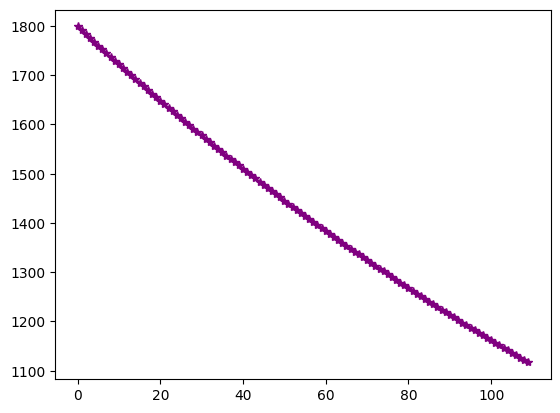

In [33]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss_history, color='purple',marker='*')

## **Step 6: Validate the model**

In [34]:
# Predictiong the Target Variable using the best intercept and slopes found via gradient descent Cost Function
test_m = X1.shape[0]
test_prediction = np.zeros(test_m)
for i in range(test_m):
    test_prediction[i] = best_theta0 + (best_theta1 * X1[i])+ (best_theta2 * X2[i])

<ipython-input-34-4fdc8878ecfc>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_prediction[i] = best_theta0 + (best_theta1 * X1[i])+ (best_theta2 * X2[i])


In [35]:
#Mean Squared Error
error = 0
for i in range(test_m):
    error = error + (y[i] - test_prediction[i])**2

error = error/test_m
print("Error found : ",error)


Error found :  [16.89954207]


In [36]:
#R-squared accuracy
err_n = 0
err_d = 0
mean_y_test = np.mean(y)
print("Mean of actual values is : ",mean_y_test)
for i in range(test_m):
    err_n = err_n + (y[i] - test_prediction[i])**2
    err_d = err_d + (y[i] - mean_y_test)**2

fracn = err_n/err_d
acc = 1 - fracn
print("Model accuracy : ",acc)
print("Model accuracy in percent : ",acc*100)

Mean of actual values is :  40.216883872363866
Model accuracy :  [0.90688761]
Model accuracy in percent :  [90.68876132]


## **Step 7: Visualize the Results**

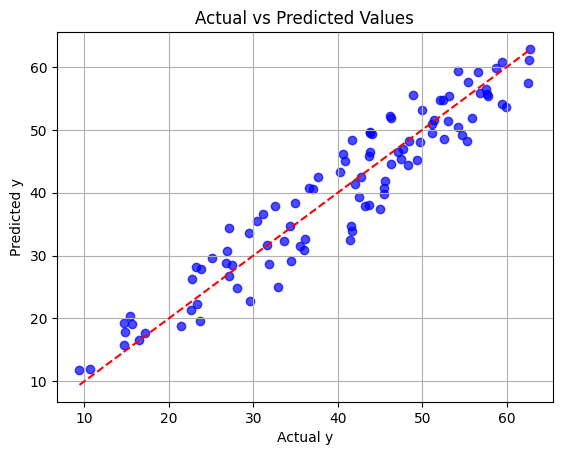

In [37]:
plt.scatter(y, test_prediction, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.grid(True)
plt.show()

# **SUMMARY**

At LR = 0.0011 and n_iter = 110 we get the best accuracy possible for this dataset at 90.68%.

The red dashed line represents the ideal case where the predicted values are exactly equal to the actual values (i.e., the 45-degree line). Points close to this line indicate that the predictions are very close to the actual values. Points scattered away from the line means the model has some errors in predicting the exact values.

Below mentioned are the various iterations tried for the hyperparameter to arrive at the best parameters of **learning rate = 0.0011 and n_terations = 110**

For avoiding distorted graphs below two reading have been not considered while creating the graph.

**Hyperparameters**

learning_rate = 0.0001
n_iterations =100

Error found :  [1488.05360331]

Model accuracy :  [-7.19881522]
Model accuracy in percent :  [-719.88152176]

**Hyperparameters**

learning_rate = 0.0001
n_iterations =1000

Error found :  [58.22719714]

Model accuracy :  [0.67918224]
Model accuracy in percent :  [67.91822358]


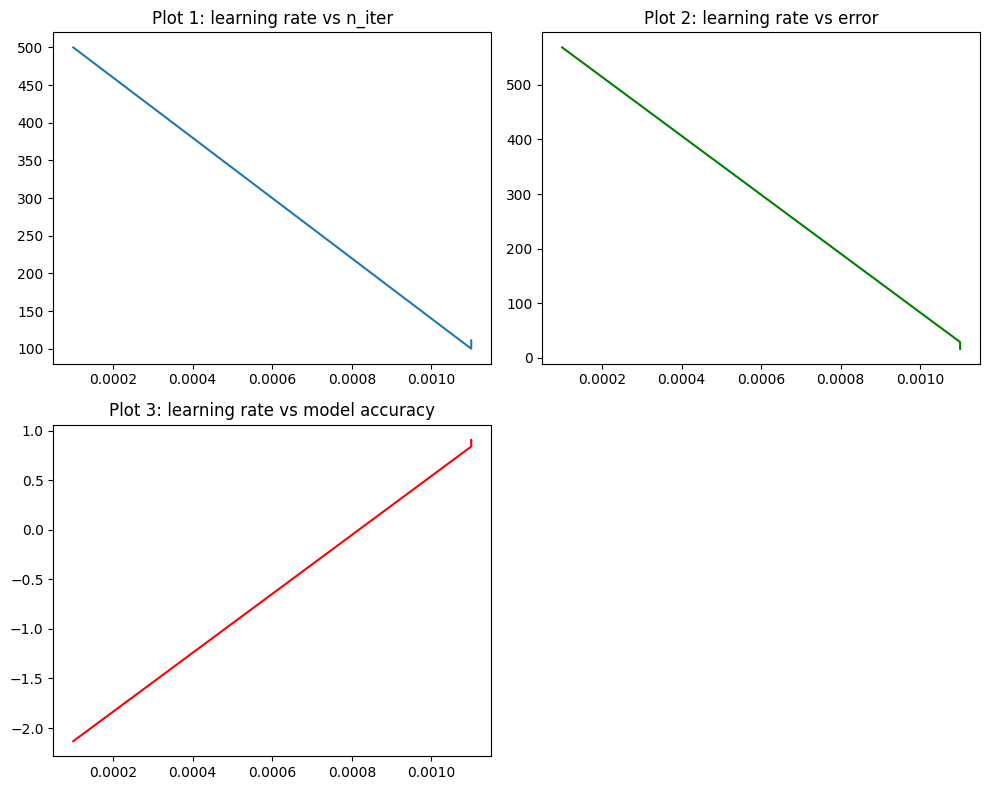

In [24]:
import matplotlib.pyplot as plt

x = [0.0001, 0.0011, 0.0011, 0.0011]
y1 = [500, 100, 110, 111]  # Line 1 - n_iterations
y2 = [568.5898165, 29.10593549, 16.89954207, 17.01010918]    # Line 2 - error
y3 = [-2.13279228, 0.83963334, 0.90688761, 0.90627842]  # Line 3 - model accuracy (not in percentage)

#plt.figure(figsize=(10, 5))

# Create 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns (total of 4 subplots)

# Plot data in the first subplot (top-left)
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Plot 1: learning rate vs n_iter')

# Plot data in the second subplot (top-right)
axs[0, 1].plot(x, y2, 'g')  # Use green color for the line
axs[0, 1].set_title('Plot 2: learning rate vs error')

# Plot data in the third subplot (bottom-left)
axs[1, 0].plot(x, y3, 'r')  # Use red color for the line
axs[1, 0].set_title('Plot 3: learning rate vs model accuracy')

# Leave the fourth subplot (bottom-right) empty
axs[1, 1].axis('off')  # Turn off axis for the empty subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
